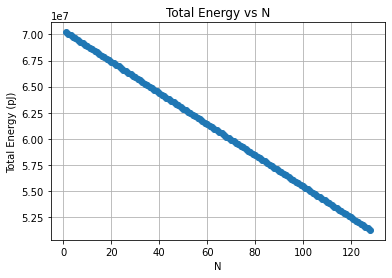

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt


directory = "VAMPIRE/tests/traces/csvs"


N_values = []
total_energy_values = []


for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Extract N value from the filename
        N = int(filename.split('-')[0])
        # Read the CSV file and extract the "total energy" parameter
        df = pd.read_csv(os.path.join(directory, filename), header=None)
        for index, row in df.iterrows():
            if 'total energy' in row.str.lower().values:
                total_energy_index = row[row.str.lower() == 'total energy'].index[0]
                total_energy = float(row[total_energy_index + 1])
                # Append N and total energy values to lists
                N_values.append(N)
                total_energy_values.append(total_energy)
                break  # Assuming each file has only one "total energy" value

plt.plot(N_values, total_energy_values, marker='o', linestyle='-')
plt.xlabel('N')
plt.ylabel('Total Energy (pJ)')
plt.title('Total Energy vs N')
plt.grid(True)
plt.show()